In [7]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape( -1, 28, 28, 1) / 255.0

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential( [Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
                     MaxPooling2D((2,2)),
                     Conv2D(64, (3,3), activation = 'relu'),
                     MaxPooling2D((2,2)),
                     Flatten(),
                     Dense(64, activation = 'relu'),
                     Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9021 - loss: 0.3219 - val_accuracy: 0.9866 - val_loss: 0.0442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9847 - val_loss: 0.0459
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 31ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9885 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9896 - val_loss: 0.0326


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test accuracy: ", test_accuracy )

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9871 - loss: 0.0393
test accuracy:  0.9896000027656555


In [16]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_mod(optimizer='adam'):
  model = Sequential([
      Conv2D(32, (3,3), activation= 'relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2,2)),
      Conv2D(64, (3,3), activation = 'relu'),
      MaxPooling2D((2,2)),
       Flatten(),
      Dense(64, activation = 'relu'),
      Dense(10, activation = 'softmax')
  ])


  model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])
  return model


param_grid = {
    'batch_size': [32,64],
    'epochs' : [5,10],
    'optimizers' : ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_search_result = grid_search.fit(X_train, y_train)

best_params = grid_search_result.best_params_
best_model = grid_search_result.best_estimator_.model


test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Best model test accuracy:", test_accuracy)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9907 - val_loss: 0.0366 - learning_rate: 0.0010
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9899 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9911 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9884 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9895 - val_loss: 0.0409 - learning_rate: 0.0010


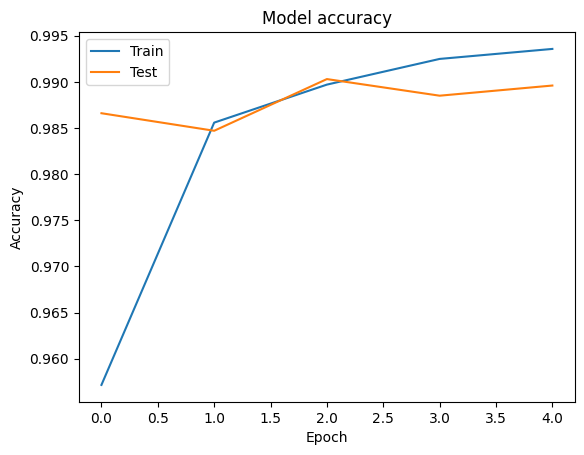

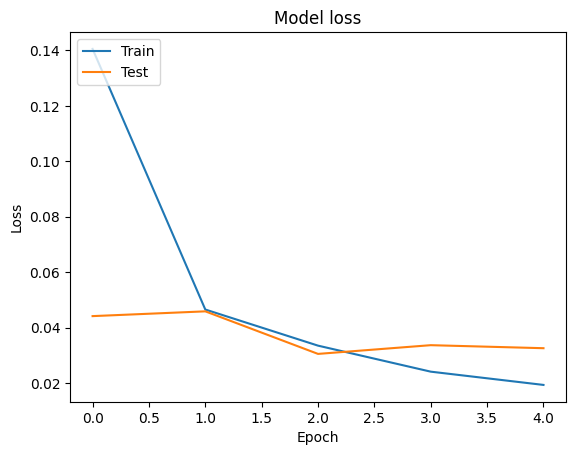

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.callbacks import ReduceLROnPlateau



vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[reduce_lr])


loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.5686 - loss: 0.6649 - val_accuracy: 0.8106 - val_loss: 0.4301 - learning_rate: 0.0010
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.8424 - loss: 0.3716 - val_accuracy: 0.8342 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9028 - loss: 0.2491 - val_accuracy: 0.8130 - val_loss: 0.4250 - learning_rate: 0.0010
Epoch 4/10
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9465 - loss: 0.1540